In [2]:
import numpy as np
import torch
from IPython.display import Image
import matplotlib.pyplot as plt

## 1. forward & backward

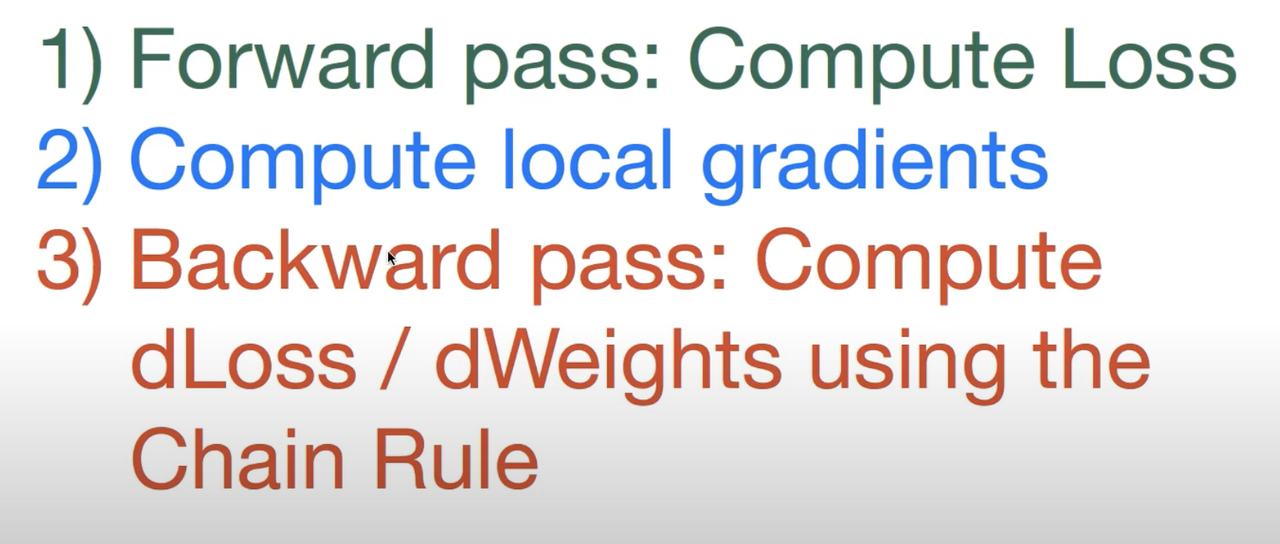

In [4]:
Image('./imgs/forward_backward.PNG', width=600, height=450)

- loss = f(g(h(x))): 前向计算loss
- loss.backward()：计算所有 requires_grad == True 的 node(tensor)
    - loss 反向传播，计算 dLoss/dweights
    - x.grad += dloss/dx（累积的过程）
- optimizer.step(): 
    - x += -lr * x.grad
    - 在每个 batch 调用 loss.backward() 之前一般需要调用一次 optim.zero_grad()

In [20]:
criterion = nn.XXLoss()
model = XXNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)

for _ in range(epochs):
    for images, labels in data_loader:
        output = model(images)
        loss = criterion(output, labels)
        
        # model.parameters(): 连接layer与layer之间的 weights、bias
        # model.parameters().grad = 0
        optimizer.zero_grad()
        
        # requires_grad == True 的 tensor
        loss.backward()     
        
        # model.parameters(): 连接layer与layer之间的 weights、bias
        # model.parameters() += lr * model.parameters().grad
        optimizer.step()

NameError: name 'nn' is not defined

## 2. 一个示例

- optimizer.zero_grad()
- loss.backward()
- optimizer.step()

In [25]:
x = torch.tensor([1., 2.], requires_grad=True)
y = 100*x
loss = y.sum()
optimizer = torch.optim.SGD([x], lr=0.01)

optimizer.zero_grad()
loss.backward()
# w = w - lr*w.grad
# b = b - lr*b.grad
optimizer.step()

In [26]:
x.grad

tensor([100., 100.])

In [27]:
x.data

tensor([0., 1.])

In [28]:
x

tensor([0., 1.], requires_grad=True)

In [30]:
0.01*x.grad

tensor([1., 1.])